# Basic models

## Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels as sm
import scipy as sp
import scipy.stats as ss
import statsmodels.tsa.arima_model as sta
import statsmodels.tsa.seasonal as sts
import sklearn.metrics as skm

In [2]:
%run ts_utilities.ipynb

ERROR:root:File `'ts_utilities.ipynb.py'` not found.


## Testing data

In [8]:
dt1 = [123, 112, 118, 104, 105, 107, 114, 119, 123, 127, 132, 144]
idx = pd.DatetimeIndex(['2020-01-01', '2020-01-02','2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'])
ts1 = pd.Series(data = dt1, index=idx)

2020-01-01    123
2020-01-02    112
2020-01-03    118
2020-01-04    104
2020-01-05    105
2020-01-06    107
2020-01-07    114
2020-01-08    119
2020-01-09    123
2020-01-10    127
2020-01-11    132
2020-01-12    144
dtype: int64

## Descomposition

<ipython-input-4-f6078d748317>:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sts.seasonal_decompose(ts, freq=12, model='additive')


1962-01-01 00:00:00.000000000   NaN
1970-01-01 00:00:00.000000589   NaN
1962-02-01 00:00:00.000000000   NaN
1970-01-01 00:00:00.000000561   NaN
1962-03-01 00:00:00.000000000   NaN
                                 ..
1970-01-01 00:00:00.000000706   NaN
1968-11-01 00:00:00.000000000   NaN
1970-01-01 00:00:00.000000677   NaN
1968-12-01 00:00:00.000000000   NaN
1970-01-01 00:00:00.000000711   NaN
Name: trend, Length: 168, dtype: float64
1962-01-01 00:00:00.000000000    -18.669605
1970-01-01 00:00:00.000000589    -58.858707
1962-02-01 00:00:00.000000000     34.897703
1970-01-01 00:00:00.000000561     49.913729
1962-03-01 00:00:00.000000000    110.407318
                                    ...    
1970-01-01 00:00:00.000000706     -9.563835
1968-11-01 00:00:00.000000000    -51.926015
1970-01-01 00:00:00.000000677    -48.679220
1968-12-01 00:00:00.000000000    -79.467682
1970-01-01 00:00:00.000000711    -43.156784
Name: seasonal, Length: 168, dtype: float64
1962-01-01 00:00:00.000000000   NaN

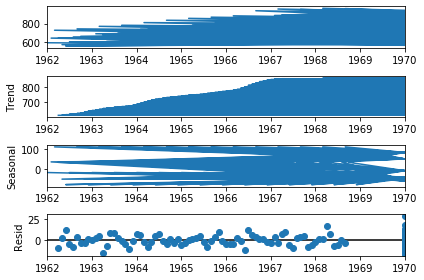

In [4]:
df = pd.read_csv('D:/data/csv/MilkProd.csv')
dates = df.iloc[:,0:].values.flatten()
datess = pd.to_datetime(dates[:168])
values = df.iloc[:,1:].values.flatten()
ts = pd.Series(values, datess)
res = sts.seasonal_decompose(ts, freq=12, model='additive')
print(res.trend)
print(res.seasonal)
print(res.resid)
print(res.observed)

res.plot()
plt.show()

## Autocorrelation

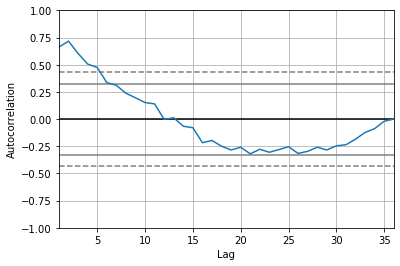

In [59]:
pd.plotting.autocorrelation_plot(series);

## ARIMA Process

Load data

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


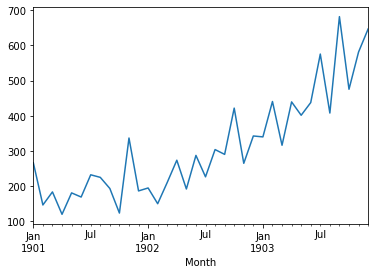

In [60]:
def parser(x):
    return dt.datetime.strptime('190'+x, '%Y-%m')

ts = pd.read_csv('D:/data/csv/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(ts.head())
ts.plot()

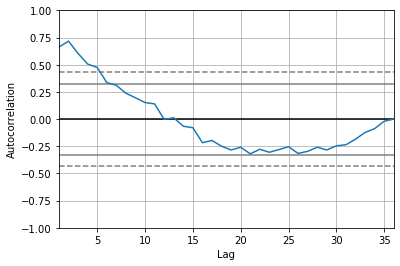

In [61]:
pd.plotting.autocorrelation_plot(ts);

In [63]:
model = sta.ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Wed, 22 Apr 2020   AIC                            406.340
Time:                        16:38:03   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plot residual errors

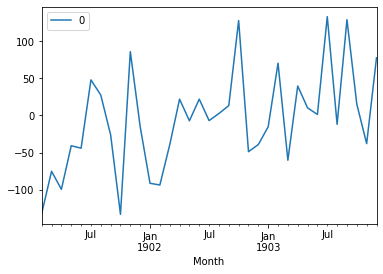

In [66]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

                0
count   35.000000
mean    -5.495183
std     68.132883
min   -133.296561
25%    -42.477865
50%     -7.186587
75%     24.748375
max    133.238011


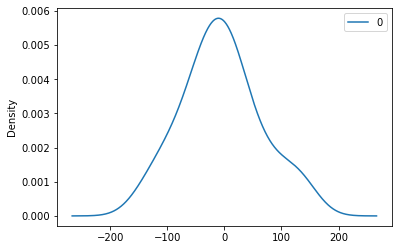

In [67]:
residuals.plot(kind='kde')
print(residuals.describe())

Arima Forecast

In [73]:
X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sta.ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = skm.mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117734, expected=342.300000
predicted=306.513002, expected=339.700000
predicted=387.376436, expected=440.400000
predicted=348.154209, expected=315.900000
predicted=386.308798, expected=439.300000
predicted=356.082063, expected=401.300000
predicted=446.379484, expected=437.400000
predicted=394.737309, expected=575.500000
predicted=434.915469, expected=407.600000
predicted=507.923369, expected=682.000000
predicted=435.482710, expected=475.300000
predicted=652.743868, expected=581.300000
predicted=546.343505, expected=646.900000
Test MSE: 6958.328


In [1]:
plt.plot(test);
plt.plot(predictions, color='red');

NameError: name 'plt' is not defined

## Credits & Links

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/